In [1]:
# Import all the necessary libraries
import os
import numpy as np
import torch
import importlib
import skimage as sk
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from typing import Callable
import cv2 as cv
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects

In [2]:
def display_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def display_img_side(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')
    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')
    plt.show()

In [3]:
def remove_objects(img_th, size):
    """
    Remove objects from input image that are smaller than size argument.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    size: int
        Minimal size of objects

    Return
    ------
    img_obj: np.ndarray (M, N)
        Image after remove small objects operation
    """

    # Define default value for input image
    img_obj = np.zeros_like(img_th)
    # ------------------
    # Your code here ... 
    img_th = img_th.astype(bool)
    img_obj = remove_small_objects(img_th, size)
    # ------------------

    return img_obj

def apply_closing(img_th, disk_size):
    """
    Apply closing to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for closing

    Return
    ------
    img_closing: np.ndarray (M, N)
        Image after closing operation
    """

    # Define default value for output image
    img_closing = np.zeros_like(img_th)

    # ------------------
    # Your code here ...
    img_closing = closing(img_th, disk(disk_size)) 
    # ------------------

    return img_closing

def apply_closing(img_th, disk_size):
    """
    Apply closing to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for closing

    Return
    ------
    img_closing: np.ndarray (M, N)
        Image after closing operation
    """

    # Define default value for output image
    img_closing = np.zeros_like(img_th)

    # ------------------
    # Your code here ...
    img_closing = closing(img_th, disk(disk_size)) 
    # ------------------

    return img_closing


def apply_opening(img_th, disk_size):
    """
    Apply opening to input mask image using disk shape.

    Args
    ----
    img_th: np.ndarray (M, N)
        Image mask of size MxN.
    disk_size: int
        Size of the disk to use for opening

    Return
    ------
    img_opening: np.ndarray (M, N)
        Image after opening operation
    """

    # Define default value for output image
    img_opening = np.zeros_like(img_th)

    # ------------------
    # Your code here ... 
    selem = disk(disk_size)
    img_opening = opening(img_th, selem)
    # ------------------

    return img_opening


def apply_median(img, kernel_size):
    """
    Apply median filter to input image.

    Args
    ----
    img: np.ndarray (M, N)
        Image to apply median filter.
    kernel_size: int
        Size of kernel for median filter.

    Return
    ------
    img_median: np.ndarray (M, N)
        Image after applying median filter.
    """

    # Define default value for input image
    img_median = np.zeros_like(img)
    # ------------------
    # Your code here ... 
    img_median = sk.filters.median(img, disk(kernel_size))
    # ------------------

    return img_median

def apply_threshold(img, threshold):
    """
    Apply threshold to input image.

    Args
    ----
    img: np.ndarray (M, N)
        Image to apply threshold.
    threshold: float
        Threshold value.

    Return
    ------
    img_th: np.ndarray (M, N)
        Image after applying threshold.
    """

    # Define default value for input image
    img_th = np.zeros_like(img)
    img_th = img / np.max(img) * 255
    # ------------------
    # Your code here ... 
    img_th = img_th > threshold
    # ------------------

    return img_th

def apply_gaussian(img, sigma):
    """
    Apply gaussian filter to input image.

    Args
    ----
    img: np.ndarray (M, N)
        Image to apply gaussian filter.
    sigma: float
        Standard deviation for gaussian filter.

    Return
    ------
    img_gaussian: np.ndarray (M, N)
        Image after applying gaussian filter.
    """

    # Define default value for input image
    img_gaussian = np.zeros_like(img)
    # ------------------
    # Your code here ... 
    img_gaussian = sk.filters.gaussian(img, sigma=sigma)
    # ------------------

    return img_gaussian

def getThresholdedImage(imgGray):
    low_pass = cv.GaussianBlur(imgGray, (31, 31), 0)
    high_pass = cv.subtract(imgGray, low_pass) 
    inverted_HP = (255 - high_pass)
    _, inverted_thresholded = cv.threshold(inverted_HP, 251, 255, cv.THRESH_BINARY)
    _, thresholded = cv.threshold(high_pass, 4, 255, cv.THRESH_BINARY)

    return inverted_thresholded, thresholded


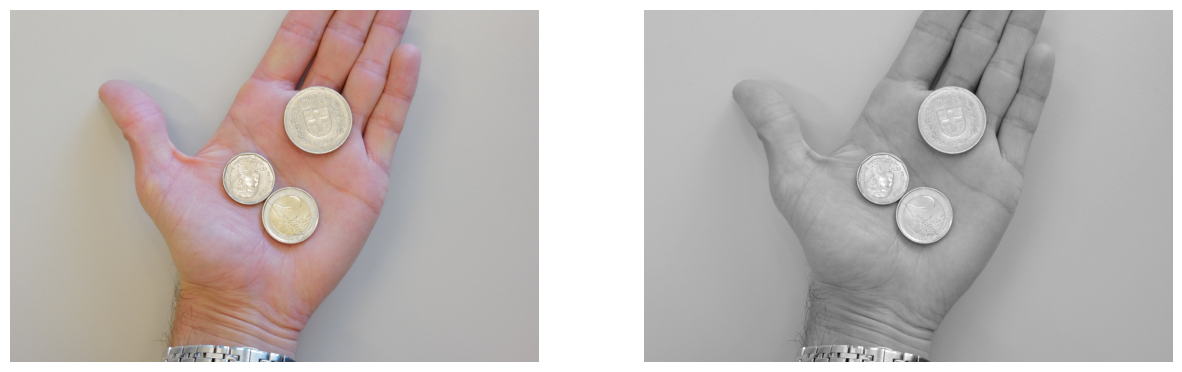

In [4]:
TEST = "HAND" # HAND, NOISY_BG, NEUTRAL_BG

if TEST == "NEUTRAL_BG":
    img = cv.imread('../data/train/1. neutral_bg/L1010311.JPG')

elif TEST == "HAND":
    img = cv.imread('../data/train/6. hand_outliers/L1010521.JPG')

else:
    img = cv.imread('../data/train/2. noisy_bg/L1010328.JPG')


img = cv.resize(img, (0,0), fx=0.25, fy=0.25)

imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

display_img_side(imgRGB, imgGray)

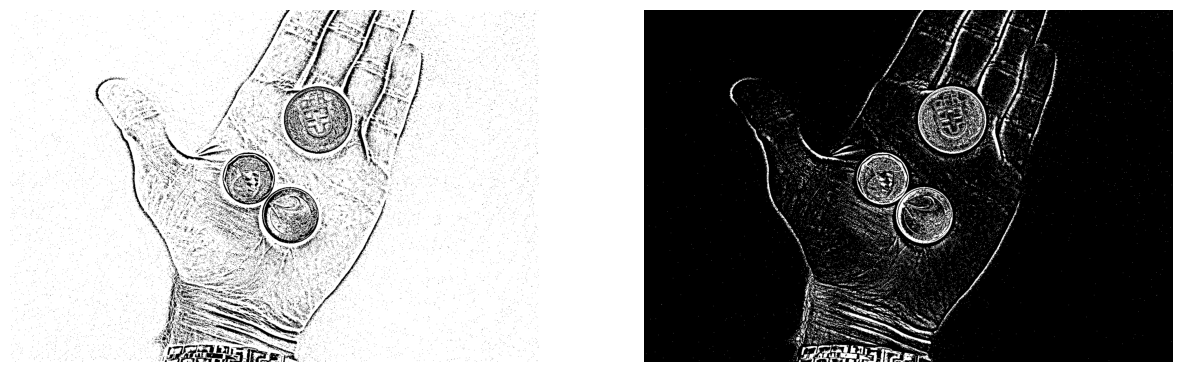

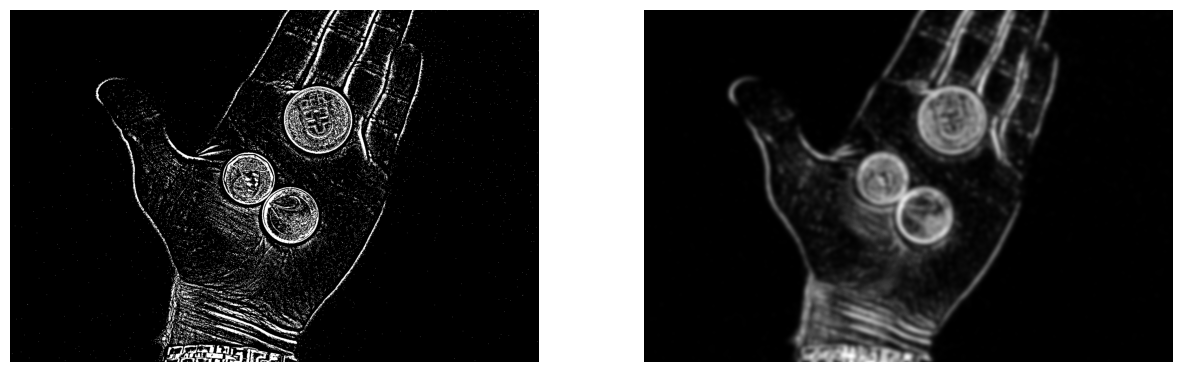

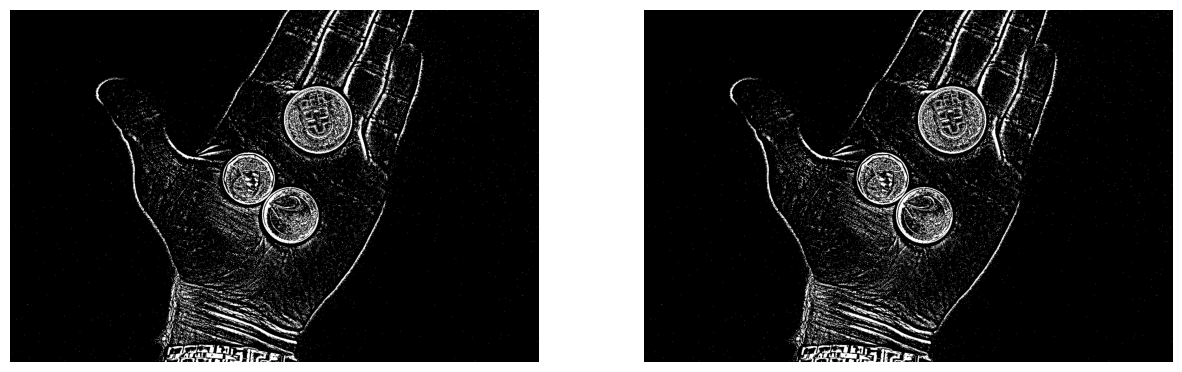

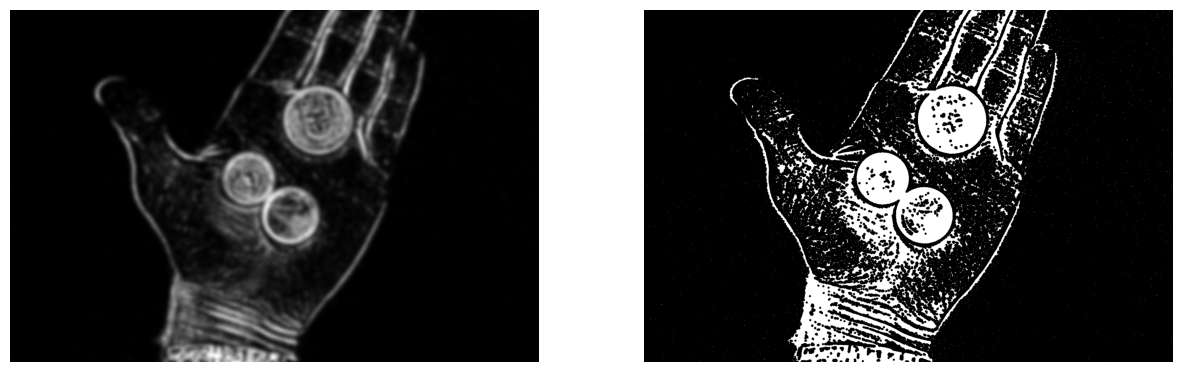

In [5]:
# Get thresholded image
inv_th, th = getThresholdedImage(imgGray)
display_img_side(inv_th, th)

# Blur the image to "clean" it
imgBlur = apply_gaussian(th, 6)
display_img_side(th, imgBlur)

# Apply thresholding
imgTh = apply_threshold(th, 80)
display_img_side(th, imgTh)

# Apply closing operation
imgClosing = apply_closing(imgTh, 3)
display_img_side(imgBlur, imgClosing)

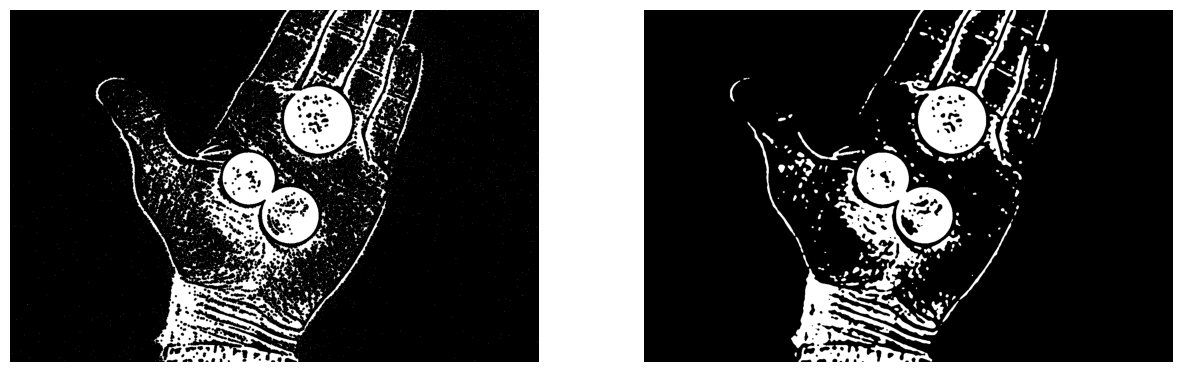

In [6]:
filtered_median = apply_median(imgClosing, 5)
display_img_side(imgClosing, filtered_median)

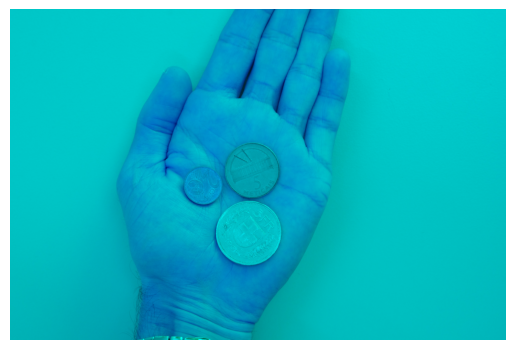

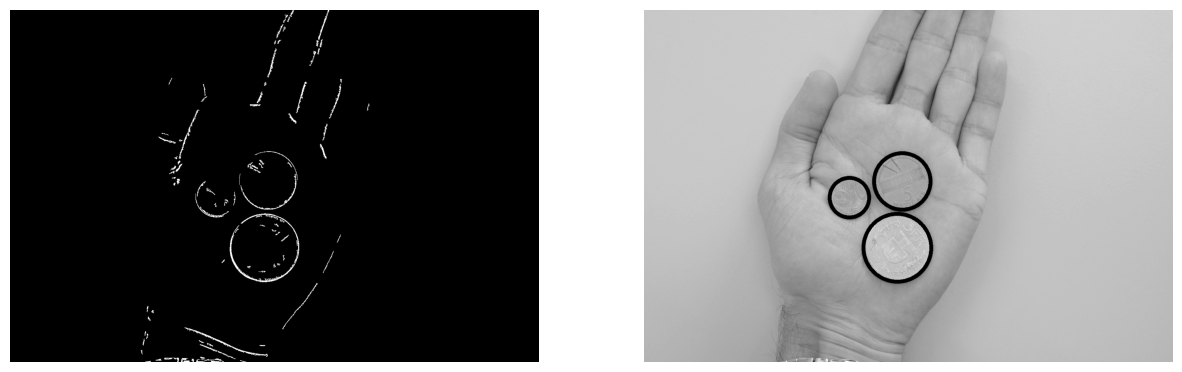

162.12148
18.162948547604636


KeyboardInterrupt: 

In [88]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import os

def sas(imgGray, size = 45, sigma = 2.7, thres1 = 247, thres2 = 6):

    std = np.std(imgGray)

    if std < 19:
        thres2 = 4
        sigma = 2.7
        p2 = 32
        th_sigma = 2.5
        open_th = 6
    
    elif std > 24:
        thres2 = 6
        sigma = 2.7
        p2 = 35
        th_sigma = 1.5
        open_th = 3
    
    else:
        thres2 = 6
        sigma = 2.4
        p2 = 35
        th_sigma = 1.5
        open_th = 3

    low_pass = cv.GaussianBlur(imgGray, (size, size), sigma)
    high_pass = cv.subtract(imgGray, low_pass) 
    inverted_HP = (255 - high_pass)
    _, inverted_thresholded = cv.threshold(inverted_HP, thres1, 255, cv.THRESH_BINARY)
    _, thresholded = cv.threshold(high_pass, thres2, 255, cv.THRESH_BINARY)

    #thresholded = np.uint8(remove_objects(thresholded, 16) * 255)
    thresholded = np.uint8(remove_objects(thresholded, 30) * 255)
    thresholded_open = apply_closing(thresholded, open_th) # 3
    thresholded_open = cv.GaussianBlur(thresholded_open, (size, size), th_sigma) # 2

    imgGray_copy = imgGray.copy()

    circles = cv.HoughCircles(thresholded_open, cv.HOUGH_GRADIENT, dp=1, minDist=50, param1=15, param2=p2, minRadius=40, maxRadius=120) # 32
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv.circle(imgGray_copy, (i[0], i[1]), i[2], (0, 0, 0), 10)

    display_img_side(thresholded, imgGray_copy)

# set the default values for the parameters in the interactive plot
#interact(sas, size=(25, 51, 2), sigma=(0, 2, 0.1), thres1=(200, 255, 1), thres2=(1, 20, 1)) 

# apply the function to all the images in the folder
def process_images(folder):
    images = os.listdir(folder)
    for image in images:
        img = cv.imread(os.path.join(folder, image))

        # filter blue and green channels
        img[:, :, 0] = 0
        display_img(img)

        img = cv.resize(img, (0,0), fx=0.25, fy=0.25)
        imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        sas(imgGray)
        print(np.mean(imgGray))
        print(np.std(imgGray))

process_images('../data/train/6. hand_outliers')
# process_images('../data/train/3. hand')
# process_images('../data/train/test_coin')
#process_images('../data/train/1. neutral_bg')
#process_images('../data/train/4. neutral_bg_outliers')
process_images('../data/train/2. noisy_bg')
process_images('../data/train/5. noisy_bg_outliers')

# 45 1.7 247 12